# 1. Introduction

## 1.1 Background

Credit One has recently experienced a significant increase in customer loan defaults. As their credit scoring service provider, this trend presents a serious risk to their business, potentially leading to revenue loss and a decline in client retention. To address this issue, our Data Science team has been tasked with developing a robust, data-driven solution that will enable Credit One to make more accurate credit approval decisions.

## 1.2 Objective

The primary objective of this project is to design a predictive model that can accurately assess the creditworthiness of customers, thereby reducing the default rate. This model will empower Credit One to make informed decisions on whether to approve or deny loan applications, minimizing financial risk.

## 1.3 Project Scope

This project differs from typical data analytics tasks as it requires a deep dive into data science methodologies. We are given full autonomy to use a variety of tools and techniques to uncover actionable insights. Python will be our primary language, with a strong focus on libraries such as `Pandas`, `NumPy`, and `Sci-Kit Learn`. However, we are encouraged to explore additional libraries that may enhance our analysis.

The key stages of the project include:

- **Problem Definition:** 
   - Understanding the distinction between data analytics and data science within the context of this problem.
   - Establishing a data science framework to address the issue.
- **Data Preparation and Exploration:** 
   - Importing and cleaning the provided data.
   - Conducting exploratory data analysis (EDA) to identify significant patterns and trends.
- **Model Building:**
   - Constructing multiple predictive models using different algorithms.
   - Comparing model performance to select the most effective approach.
- **Model Evaluation and Refinement:**
   - Validating the chosen model.
   - Refining the model based on performance metrics.
   - Considering alternative methods if initial results are unsatisfactory.

## 1.4 Investigative Focus

As we proceed, the following investigative questions will guide our analysis:

- How can we ensure that customers will be able to repay their loans?
- Which attributes in the data are statistically significant in predicting loan defaults?
- What concrete insights can we derive from the data?
- What proven methods can we apply to uncover deeper information?

## 1.5 Conclusion

This notebook will document the methodologies, analysis, and findings throughout the project. By letting the data guide our decisions and remaining flexible in our approach, we aim to develop a solution that effectively addresses Credit One's challenges and improves their credit approval process.nges and improves their credit approval process.

---


# Data Cleaning

It is essential to ensure the accuracy and reliability of the models we build. Since we're predicting loan defaults, any errors, missing values, or inconsistencies in the data could lead to misleading results, impacting the effectiveness of our predictions. By cleaning the data, we remove noise, handle missing values, and correct any anomalies, ensuring that our analysis is based on high-quality data, which ultimately improves the model's performance and reliability in assessing creditworthiness.

In [5]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

data = pd.read_csv('Credit_one_df.csv')

In [6]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,3665,220000,female,university,1,32,0,0,0,0,...,208355,213015,217475,7200,9000,10000,8000,8010,8500,not default
3666,3666,70000,female,university,2,34,1,2,2,2,...,26456,28361,31873,1500,2900,0,2500,4000,0,not default
3667,3667,120000,male,university,2,37,-1,2,0,0,...,17901,19608,19143,1000,1600,800,2000,0,1600,default
3668,3668,180000,female,university,2,32,0,0,0,0,...,31057,29052,25933,1582,30000,1000,1000,1000,1000,not default


In [7]:
#ignore warnings

import warnings
warnings.filterwarnings("ignore")
#Formatting numbers in order to get only two decimals for easier reading
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
data.columns = data.iloc[0]

Let's replace the existing column names with the values from the first row of the DataFrame.

In [10]:
data = data[1:].reset_index(drop=True)

data = data.drop(data.columns[0], axis=1)

Now we establish the headers.

In [12]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,220000,female,university,1,32,0,0,0,0,0,...,208355,213015,217475,7200,9000,10000,8000,8010,8500,not default
3665,70000,female,university,2,34,1,2,2,2,0,...,26456,28361,31873,1500,2900,0,2500,4000,0,not default
3666,120000,male,university,2,37,-1,2,0,0,0,...,17901,19608,19143,1000,1600,800,2000,0,1600,default
3667,180000,female,university,2,32,0,0,0,0,0,...,31057,29052,25933,1582,30000,1000,1000,1000,1000,not default


In [13]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,3669,3669,3669,3669,3669,3669,3669,3669,3669,3669,...,3669,3669,3669,3669,3669,3669,3669,3669,3669,3669
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,453,2130,1644,2045,214,1741,1901,1875,1995,1996,...,424,460,532,667,708,798,808,827,949,2873


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   3669 non-null   object
 1   SEX                         3669 non-null   object
 2   EDUCATION                   3669 non-null   object
 3   MARRIAGE                    3669 non-null   object
 4   AGE                         3669 non-null   object
 5   PAY_0                       3669 non-null   object
 6   PAY_2                       3669 non-null   object
 7   PAY_3                       3669 non-null   object
 8   PAY_4                       3669 non-null   object
 9   PAY_5                       3669 non-null   object
 10  PAY_6                       3669 non-null   object
 11  BILL_AMT1                   3669 non-null   object
 12  BILL_AMT2                   3669 non-null   object
 13  BILL_AMT3                   3669 non-null   obje

In [15]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668
0,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,20000,120000,90000,50000,50000,50000,500000,100000,140000,20000,...,380000,50000,150000,220000,80000,220000,70000,120000,180000,50000
SEX,female,female,female,female,male,male,male,female,female,male,...,male,male,female,male,female,female,female,male,female,female
EDUCATION,university,university,university,university,university,graduate school,graduate school,university,high school,high school,...,university,university,high school,university,other,university,university,university,university,high school
MARRIAGE,1,2,2,1,1,2,2,2,1,2,...,1,1,1,2,2,1,2,2,2,1
AGE,24,26,34,37,57,37,29,23,28,35,...,50,44,43,29,27,32,34,37,32,57
PAY_0,2,-1,0,0,-1,0,0,0,0,-2,...,0,0,-1,0,0,0,1,-1,0,0
PAY_2,2,2,0,0,0,0,0,-1,0,-2,...,0,0,-1,0,0,0,2,2,0,0
PAY_3,-1,0,0,0,-1,0,0,-1,2,-2,...,0,0,2,0,0,0,2,0,0,0
PAY_4,-1,0,0,0,0,0,0,0,0,-2,...,0,0,0,0,0,0,2,0,0,0


In [16]:
data['AGE'].unique()

array(['24', '26', '34', '37', '57', '29', '23', '28', '35', '51', '41',
       '30', '49', '39', '40', '27', '47', '33', '32', '54', '58', '22',
       '25', '31', '46', '42', '43', '45', '56', '44', '53', '38', '63',
       '36', '52', '48', '55', '60', '50', '75', '61', '73', '59', '21',
       '67', '66', '62', '70', '72', '64', '65', '71', 'AGE'],
      dtype=object)

In [17]:
data.loc[data['AGE'] == 'AGE',:]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2397,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


As we can see, we have another header repeated in the DataFrame. This could mean that we have duplicated rows.

In [19]:
data.loc[0,:]

0
LIMIT_BAL                          20000
SEX                               female
EDUCATION                     university
MARRIAGE                               1
AGE                                   24
PAY_0                                  2
PAY_2                                  2
PAY_3                                 -1
PAY_4                                 -1
PAY_5                                 -2
PAY_6                                 -2
BILL_AMT1                           3913
BILL_AMT2                           3102
BILL_AMT3                            689
BILL_AMT4                              0
BILL_AMT5                              0
BILL_AMT6                              0
PAY_AMT1                               0
PAY_AMT2                             689
PAY_AMT3                               0
PAY_AMT4                               0
PAY_AMT5                               0
PAY_AMT6                               0
default payment next month       default
Name: 0, dtype

In [20]:
data.loc[2398,:]

0
LIMIT_BAL                          20000
SEX                               female
EDUCATION                     university
MARRIAGE                               1
AGE                                   24
PAY_0                                  2
PAY_2                                  2
PAY_3                                 -1
PAY_4                                 -1
PAY_5                                 -2
PAY_6                                 -2
BILL_AMT1                           3913
BILL_AMT2                           3102
BILL_AMT3                            689
BILL_AMT4                              0
BILL_AMT5                              0
BILL_AMT6                              0
PAY_AMT1                               0
PAY_AMT2                             689
PAY_AMT3                               0
PAY_AMT4                               0
PAY_AMT5                               0
PAY_AMT6                               0
default payment next month       default
Name: 2398, dt

In [21]:
data = data.drop(2397).reset_index(drop=True)

In [22]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,220000,female,university,1,32,0,0,0,0,0,...,208355,213015,217475,7200,9000,10000,8000,8010,8500,not default
3664,70000,female,university,2,34,1,2,2,2,0,...,26456,28361,31873,1500,2900,0,2500,4000,0,not default
3665,120000,male,university,2,37,-1,2,0,0,0,...,17901,19608,19143,1000,1600,800,2000,0,1600,default
3666,180000,female,university,2,32,0,0,0,0,0,...,31057,29052,25933,1582,30000,1000,1000,1000,1000,not default


In [23]:
data.loc[data['AGE'] == 'AGE',:]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [24]:
data = data.drop_duplicates()

Now we eliminated the headers and the duplicated rows.

In [26]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,50000,male,high school,1,32,2,3,2,2,2,...,41526,42209,44960,1500,1600,1700,1500,3600,0,default
2393,20000,female,high school,2,49,0,0,2,0,-1,...,10400,1150,0,3008,0,600,1150,0,0,not default
2394,130000,female,university,2,24,1,-2,-1,-1,-1,...,-3,998,937,0,3372,0,1001,939,1013,not default
2395,110000,female,high school,1,27,0,0,0,0,0,...,47316,47175,47141,2326,3000,1807,1698,1911,1808,not default


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2396 entries, 0 to 2396
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2396 non-null   object
 1   SEX                         2396 non-null   object
 2   EDUCATION                   2396 non-null   object
 3   MARRIAGE                    2396 non-null   object
 4   AGE                         2396 non-null   object
 5   PAY_0                       2396 non-null   object
 6   PAY_2                       2396 non-null   object
 7   PAY_3                       2396 non-null   object
 8   PAY_4                       2396 non-null   object
 9   PAY_5                       2396 non-null   object
 10  PAY_6                       2396 non-null   object
 11  BILL_AMT1                   2396 non-null   object
 12  BILL_AMT2                   2396 non-null   object
 13  BILL_AMT3                   2396 non-null   object
 1

We need to transform some of our coulumns into the correct format in order to work with them.

In [29]:
# Define columns
columns_to_str = ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']
columns_to_int = ['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_to_float = [
    'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

# Convert columns to string
for col in columns_to_str:
    data[col] = data[col].astype(str)

# Convert columns to integer
for col in columns_to_int:
    data[col] = data[col].astype(int)

# Convert columns to float
for col in columns_to_float:
    data[col] = data[col].astype(float)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2396 entries, 0 to 2396
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   2396 non-null   float64
 1   SEX                         2396 non-null   object 
 2   EDUCATION                   2396 non-null   object 
 3   MARRIAGE                    2396 non-null   object 
 4   AGE                         2396 non-null   int32  
 5   PAY_0                       2396 non-null   int32  
 6   PAY_2                       2396 non-null   int32  
 7   PAY_3                       2396 non-null   int32  
 8   PAY_4                       2396 non-null   int32  
 9   PAY_5                       2396 non-null   int32  
 10  PAY_6                       2396 non-null   int32  
 11  BILL_AMT1                   2396 non-null   float64
 12  BILL_AMT2                   2396 non-null   float64
 13  BILL_AMT3                   2396 non-n

# 3. EDA

In this section, we will perform an Exploratory Data Analysis (EDA) to gain a deeper understanding of the dataset provided by Credit One. The primary goal of this analysis is to identify key patterns, trends, and relationships within the data that may influence loan default rates. By exploring the data, we aim to uncover significant features, detect any anomalies or inconsistencies, and establish a foundation for building robust predictive models. This process will include visualizations, summary statistics, and correlation analysis to inform our subsequent modeling approach.

## 3.1 Univariate Analysis

### 3.1.1 Limit Balance

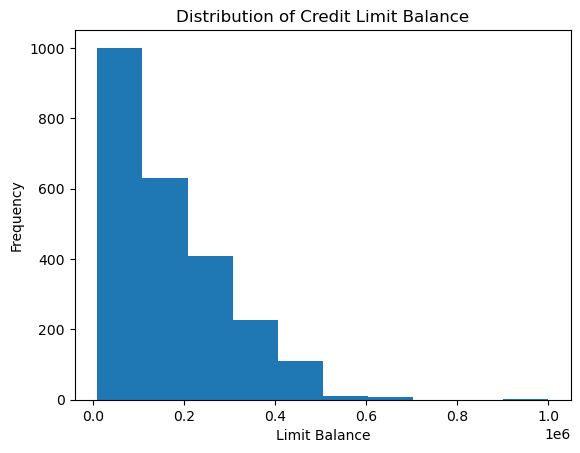

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['LIMIT_BAL'])

plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Limit Balance')

plt.show()

- Limit balance is a decreasing variable, which makes sense

### 3.1.2 Age

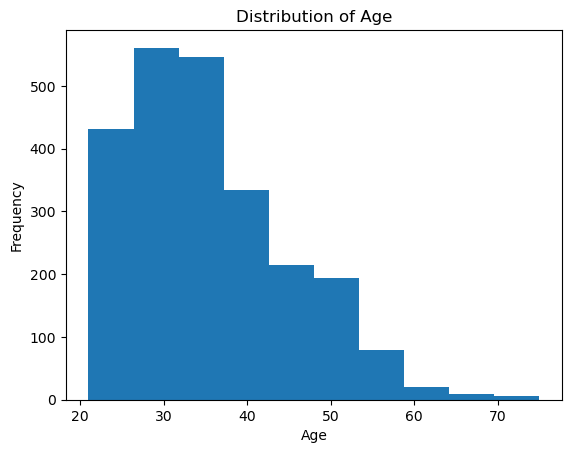

In [38]:
plt.hist(data['AGE'])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show()

- Most of the clients are beetwen 25 and 35 years old

### 3.1.3 Sex

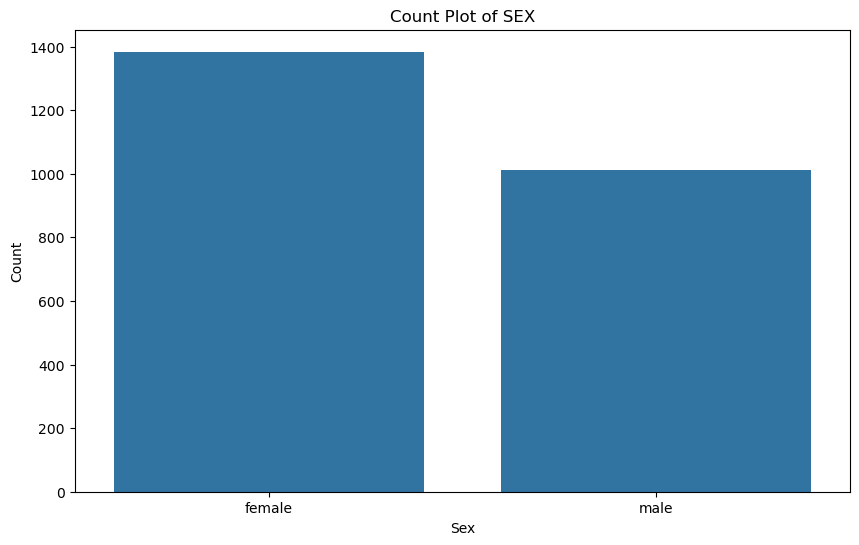

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SEX')

plt.title('Count Plot of SEX')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

- A little bit more females than males

### 3.1.4 Education

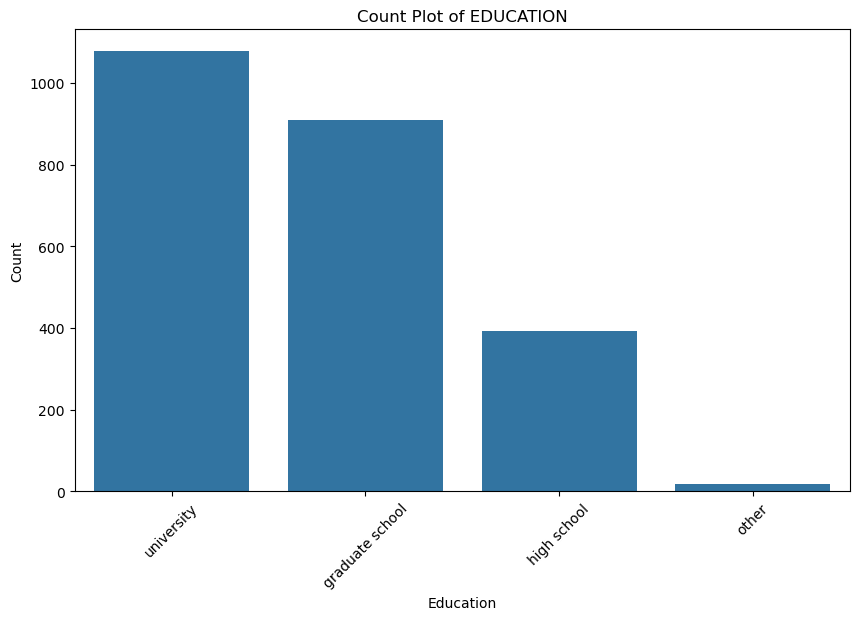

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='EDUCATION')

plt.title('Count Plot of EDUCATION')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

- Most of the clients went to university, which makes sense.

### 3.1.6 Marriage

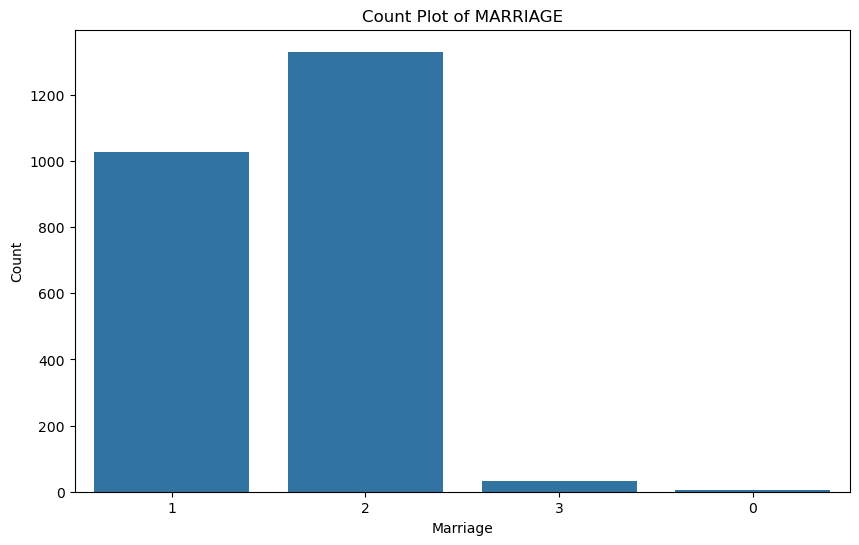

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MARRIAGE')

plt.title('Count Plot of MARRIAGE')
plt.xlabel('Marriage')
plt.ylabel('Count')

plt.show()

### 3.1.8 Default Clients

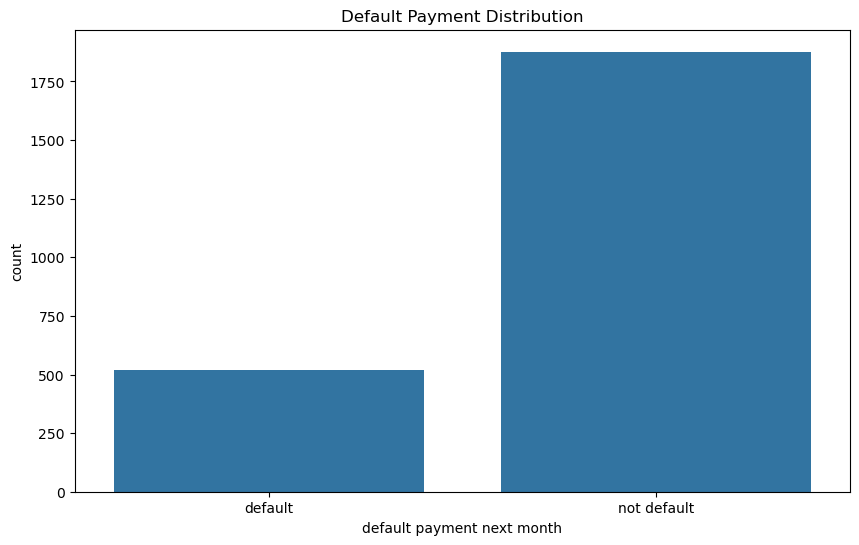

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='default payment next month')

plt.title('Default Payment Distribution')

plt.show()

- Most of the clients pay their debts

## 3.2 Bivariate Analysis

### 3.2.1 Limit Balance vs Age

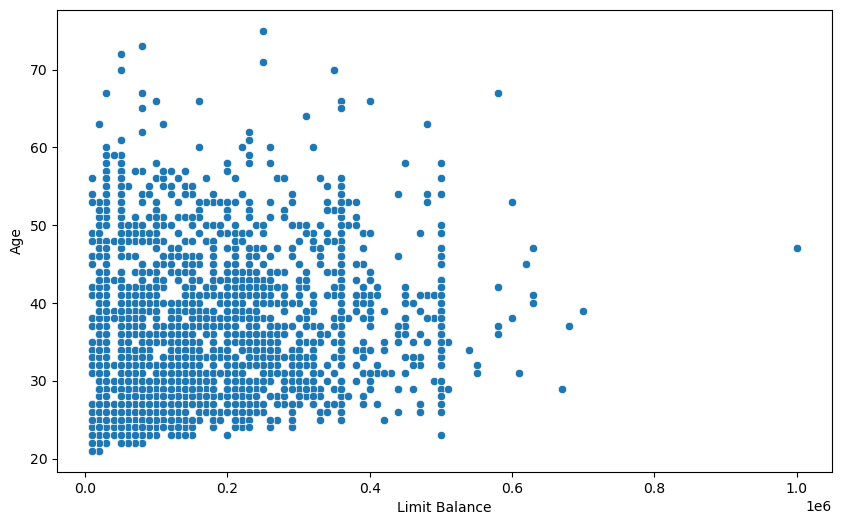

In [53]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data, x='LIMIT_BAL', y='AGE')

plt.xlabel('Limit Balance')
plt.ylabel('Age')

plt.show()

Age is not a relevant variable to define our Limit Balance

### 3.2.2 Limit Balance vs Personal Atributes (Sex, Marriage, Education and Default Client)

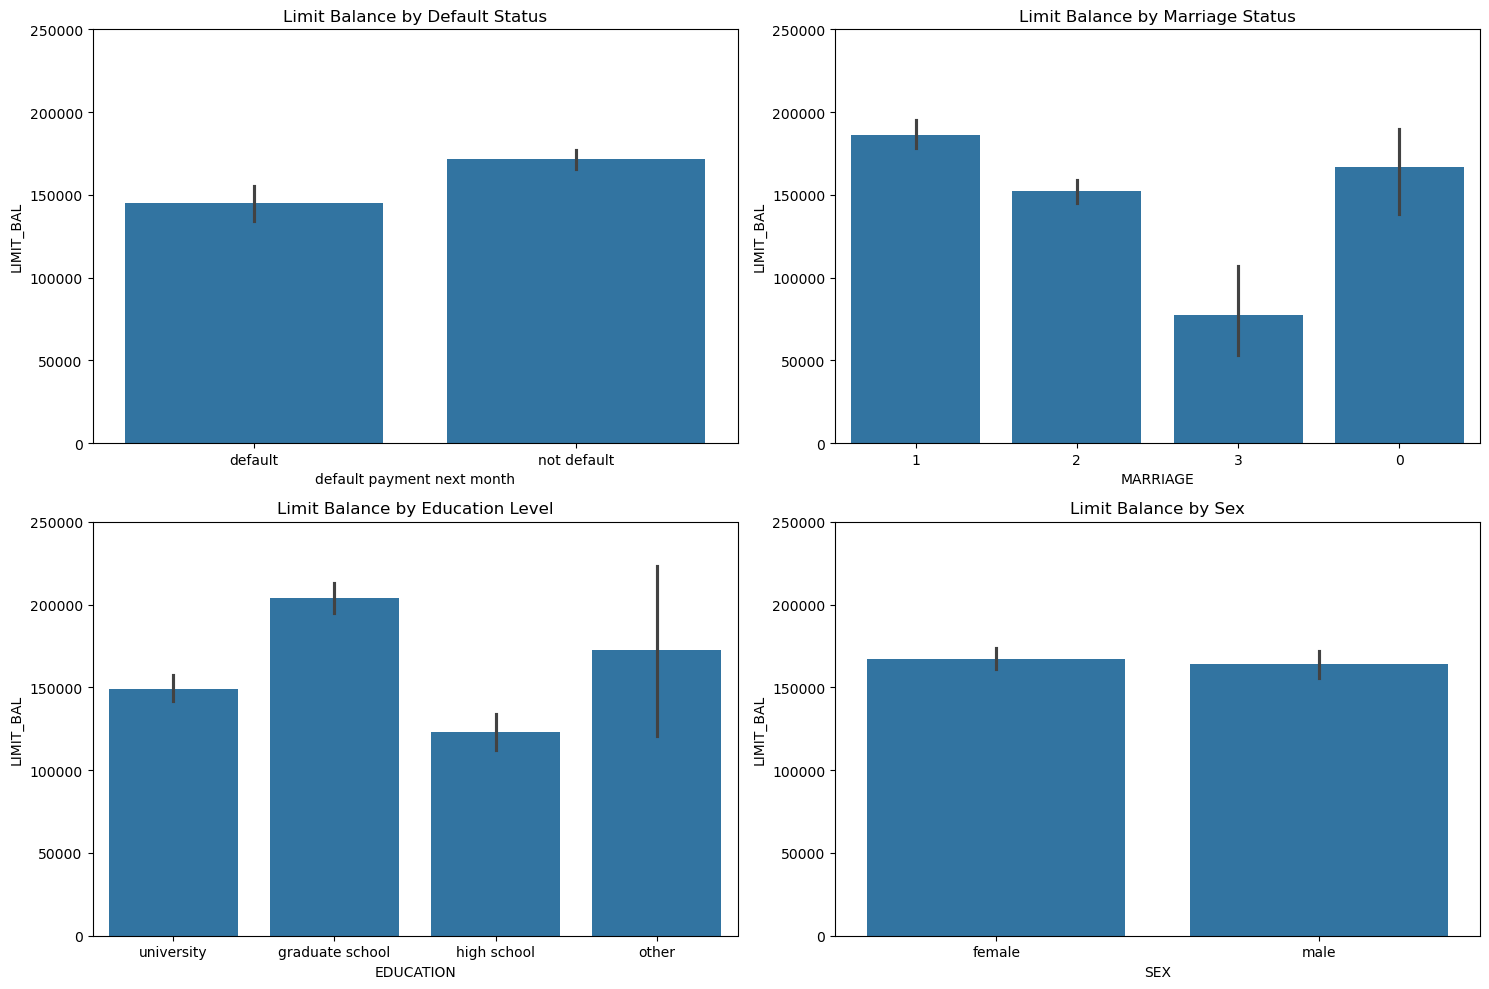

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
sns.barplot(x='default payment next month', y='LIMIT_BAL', data=data, ax=axes[0, 0])
axes[0, 0].set_ylim(0, 250000)
axes[0, 0].set_title('Limit Balance by Default Status')

# Plot 2
sns.barplot(x='MARRIAGE', y='LIMIT_BAL', data=data, ax=axes[0, 1])
axes[0, 1].set_ylim(0, 250000)
axes[0, 1].set_title('Limit Balance by Marriage Status')

# Plot 3
sns.barplot(x='EDUCATION', y='LIMIT_BAL', data=data, ax=axes[1, 0])
axes[1, 0].set_ylim(0, 250000)
axes[1, 0].set_title('Limit Balance by Education Level')

# Plot 4
sns.barplot(x='SEX', y='LIMIT_BAL', data=data, ax=axes[1, 1])
axes[1, 1].set_ylim(0, 250000)
axes[1, 1].set_title('Limit Balance by Sex')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

- The limit is higher for the non default clients.
- It seems that is lower for single people.
- The highest limit based on education is for people who gradueted from highschool.
- Sex is no relevant in order to stablish the limit.

## 3.4 Multivariate Analysis

### 3.5 Correlation

In [60]:
df = data.copy()

df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'married', 2: 'single', 3: 'divorce', 0: 'others'})

df_dummies = pd.get_dummies(df, columns=['MARRIAGE', 'SEX', 'EDUCATION', 'default payment next month'])

Let's use the function get_dummies to analize the columns marriage, sex, education and default.

In [62]:
df_dummies

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,MARRIAGE_2,MARRIAGE_3,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,"20,000.00",24,2,2,-1,-1,-2,-2,"3,913.00","3,102.00",...,False,False,True,False,False,False,False,True,True,False
1,"120,000.00",26,-1,2,0,0,0,2,"2,682.00","1,725.00",...,True,False,True,False,False,False,False,True,True,False
2,"90,000.00",34,0,0,0,0,0,0,"29,239.00","14,027.00",...,True,False,True,False,False,False,False,True,False,True
3,"50,000.00",37,0,0,0,0,0,0,"46,990.00","48,233.00",...,False,False,True,False,False,False,False,True,False,True
4,"50,000.00",57,-1,0,-1,0,0,0,"8,617.00","5,670.00",...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,"50,000.00",32,2,3,2,2,2,2,"39,589.00","40,160.00",...,False,False,False,True,False,True,False,False,True,False
2393,"20,000.00",49,0,0,2,0,-1,-1,"8,503.00","11,352.00",...,True,False,True,False,False,True,False,False,False,True
2394,"130,000.00",24,1,-2,-1,-1,-1,-1,-10.00,-10.00,...,True,False,True,False,False,False,False,True,False,True
2395,"110,000.00",27,0,0,0,0,0,0,"61,152.00","60,833.00",...,False,False,True,False,False,True,False,False,False,True


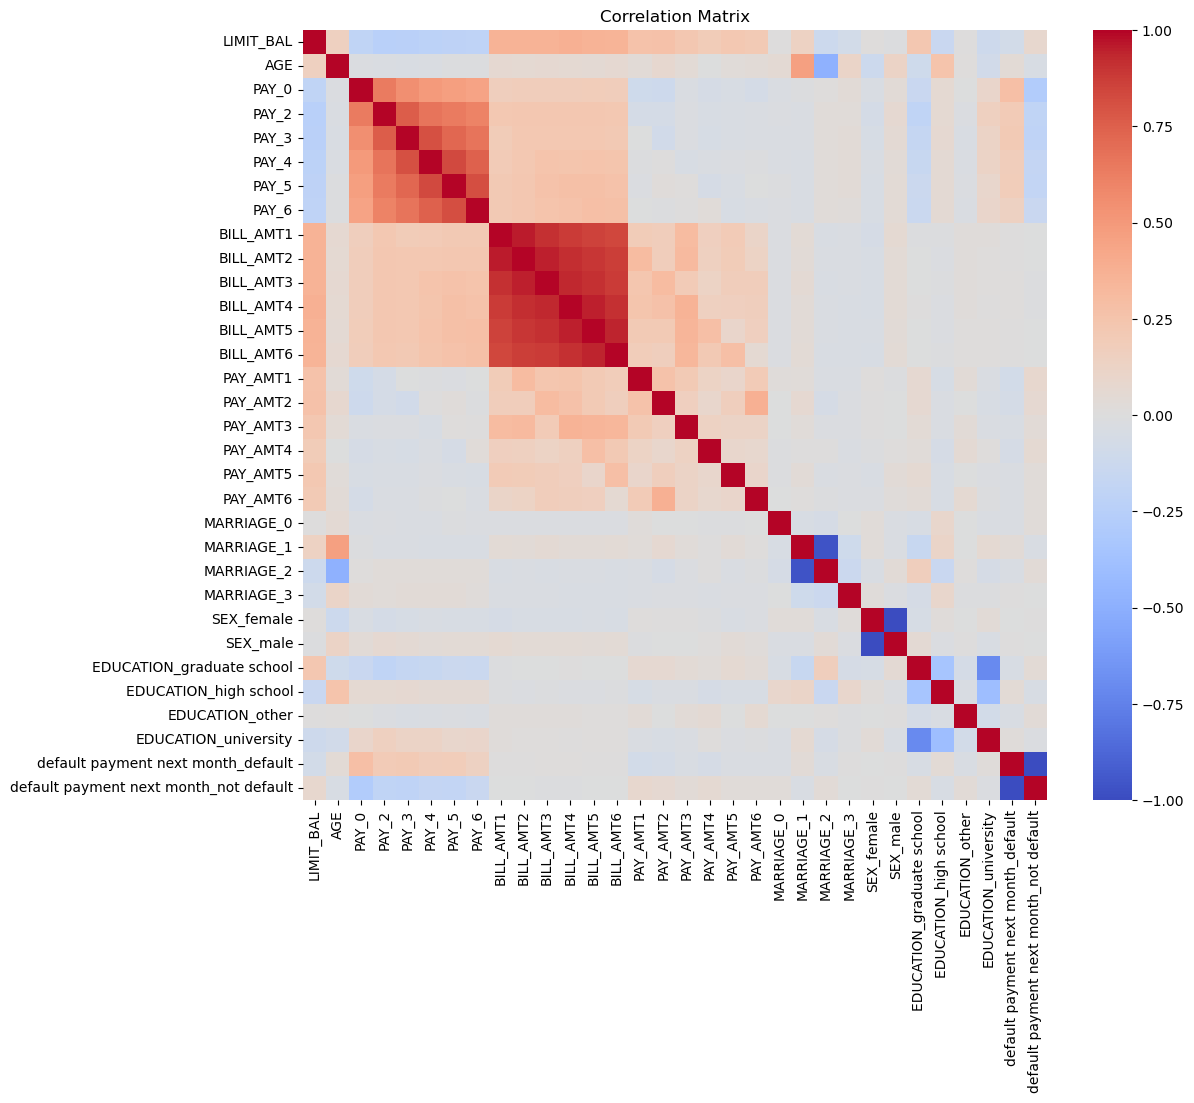

In [63]:
plt.figure(figsize=(12, 10))

corr_matrix = df_dummies.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')

plt.show()

- There is a certain correlation beetwen History of Payment , Amount Bill Statement and the Amount of Previous Payment
- Also beetwen that and the Amount of the Given Credit

### 3.6 Consumptions

I am going to rename some columns in order to work easier with them and try to explain why do we have some negative values in the columns of payments and bills.

In [67]:
data = data.rename(columns={
    
    'PAY_0': 'PAY_SEP', 'PAY_2': 'PAY_AUG', 'PAY_3': 'PAY_JUL', 'PAY_4': 'PAY_JUN', 'PAY_5': 'PAY_MAY', 'PAY_6': 'PAY_APR',
    
    'BILL_AMT1': 'BILL_AMT_SEP', 'BILL_AMT2': 'BILL_AMT_AUG', 'BILL_AMT3': 'BILL_AMT_JUL', 'BILL_AMT4': 'BILL_AMT_JUN', 'BILL_AMT5': 'BILL_AMT_MAY',
    'BILL_AMT6': 'BILL_AMT_APR',
    
    'PAY_AMT1': 'PAY_AMT_SEP', 'PAY_AMT2': 'PAY_AMT_AUG', 'PAY_AMT3': 'PAY_AMT_JUL', 'PAY_AMT4': 'PAY_AMT_JUN', 'PAY_AMT5': 'PAY_AMT_MAY', 
    'PAY_AMT6': 'PAY_AMT_APR',

    'default payment next month' : 'DEFAULT'
})

Consumption calculation:

In [69]:
# List of months to calculate consumption
months = ['MAY', 'JUN', 'JUL', 'AUG', 'SEP']

# Loop to calculate consumption for each month
for i, month in enumerate(months):
    bill_amt_current = f'BILL_AMT_{month}'
    bill_amt_previous = f'BILL_AMT_{months[i-1]}' if i > 0 else 'BILL_AMT_APR'
    pay_amt = f'PAY_AMT_{month}'
    
    consumo_column = f'CONSUMPTION_{month}'
    data[consumo_column] = data[bill_amt_current] - (data[bill_amt_previous] - data[pay_amt])

In [70]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396
0,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,"20,000.00","120,000.00","90,000.00","50,000.00","50,000.00","50,000.00","500,000.00","100,000.00","140,000.00","20,000.00",...,"110,000.00","390,000.00","150,000.00","180,000.00","500,000.00","50,000.00","20,000.00","130,000.00","110,000.00","200,000.00"
SEX,female,female,female,female,male,male,male,female,female,male,...,female,male,female,male,male,male,female,female,female,male
EDUCATION,university,university,university,university,university,graduate school,graduate school,university,high school,high school,...,university,graduate school,university,university,graduate school,high school,high school,university,high school,university
MARRIAGE,1,2,2,1,1,2,2,2,1,2,...,1,1,2,2,2,1,2,2,1,1
AGE,24,26,34,37,57,37,29,23,28,35,...,43,47,39,29,32,32,49,24,27,29
PAY_SEP,2,-1,0,0,-1,0,0,0,0,-2,...,0,-1,1,1,1,2,0,1,0,0
PAY_AUG,2,2,0,0,0,0,0,-1,0,-2,...,0,-1,2,2,-1,3,0,-2,0,0
PAY_JUL,-1,0,0,0,-1,0,0,-1,2,-2,...,0,-1,2,2,-1,2,2,-1,0,0
PAY_JUN,-1,0,0,0,0,0,0,0,0,-2,...,0,0,0,-2,-1,2,0,-1,0,2


Now, let's find the negative columns:

In [72]:
def find_negative_columns(df):
    # Initialize a list to hold columns with negative values
    negative_columns = []

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Check if there are any negative values in the column
            if (df[column] < 0).any():
                negative_columns.append(column)

    return negative_columns


# Find columns with negative values
negative_columns = find_negative_columns(data)
print("Columns with negative values:", negative_columns)

Columns with negative values: ['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'CONSUMPTION_MAY', 'CONSUMPTION_JUN', 'CONSUMPTION_JUL', 'CONSUMPTION_AUG', 'CONSUMPTION_SEP']


In [73]:
def get_rows_with_negatives(df):
    # Identify numeric columns
    numeric_columns = ['CONSUMPTION_MAY', 
                       'CONSUMPTION_JUN', 'CONSUMPTION_JUL', 'CONSUMPTION_AUG', 'CONSUMPTION_SEP']
    
    # Create a boolean mask where True indicates a negative value
    mask = df[numeric_columns] < 0
    
    # Any row that has at least one True in the mask means it has negative values
    rows_with_negatives = df.loc[mask.any(axis=1)]
    
    return rows_with_negatives


# Get rows with negative values
rows_with_negatives = get_rows_with_negatives(data)

In [74]:
rows_with_negatives

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,CONSUMPTION_MAY,CONSUMPTION_JUN,CONSUMPTION_JUL,CONSUMPTION_AUG,CONSUMPTION_SEP
6,"500,000.00",male,graduate school,2,29,0,0,0,0,0,...,"38,000.00","20,239.00","13,750.00","13,770.00",not default,"22,809.00","79,889.00","-59,646.00","7,016.00","10,942.00"
40,"360,000.00",male,graduate school,2,33,0,0,0,0,0,...,"6,000.00","188,840.00","28,000.00","4,000.00",not default,"44,745.00","621,570.00","-415,804.00","21,401.00","7,372.00"
141,"180,000.00",male,university,2,28,-1,-1,-1,-1,-1,...,332.00,500.00,"3,500.00",832.00,not default,"3,500.00",416.00,832.00,-416.00,"1,832.00"
214,"470,000.00",male,university,2,27,2,2,2,2,0,...,0.00,"10,484.00","10,838.00","10,367.00",not default,"6,024.00","185,317.00","-172,135.00","6,478.00","6,253.00"
303,"20,000.00",female,graduate school,2,25,0,0,2,0,0,...,"4,000.00","1,700.00","1,000.00","2,000.00",default,"4,251.00","1,763.00","15,996.00","-13,256.00",204.00
492,"260,000.00",male,university,2,30,0,0,0,2,0,...,207.00,"2,003.00","2,003.00","2,003.00",not default,"1,329.00","42,227.00","113,585.00","-109,222.00","1,580.00"
497,"20,000.00",male,university,2,23,0,0,2,0,0,...,820.00,"1,025.00","1,113.00",104.00,not default,"11,639.00","-10,317.00",305.00,"2,084.00","3,426.00"
577,"80,000.00",male,graduate school,2,31,-1,-1,-1,-1,2,...,"4,082.00",0.00,"4,085.00",0.00,not default,538.00,"3,544.00","8,308.00","32,229.00","-12,582.00"
592,"50,000.00",male,graduate school,1,35,0,0,0,0,0,...,215.00,249.00,"4,383.00",172.00,not default,"1,392.00","1,335.00","7,039.00","-6,838.00","30,085.00"
703,"50,000.00",female,university,3,30,1,3,2,0,0,...,"2,000.00","1,000.00","1,000.00","1,600.00",default,"-16,539.00",960.00,"31,931.00","1,457.00","1,091.00"


In [75]:
rows_with_negatives.index

Index([   6,   40,  141,  214,  303,  492,  497,  577,  592,  703,  711,  864,
        893,  970,  975, 1005, 1008, 1026, 1059, 1080, 1190, 1229, 1234, 1459,
       1508, 1523, 1636, 1659, 1672, 1682, 1688, 1716, 1787, 1810, 1966, 1989,
       2005, 2317],
      dtype='int64')

In [76]:
data.drop(rows_with_negatives.index, inplace = True)

Rows with negative values in consumption have been removed.

In [78]:
data.reset_index(inplace = True, drop = True)

# 4. Modeling

introduction!!!!

## 4.1 Data Preprocessing

In [81]:
data_modeling = data.copy()

data_modeling = pd.get_dummies(data_modeling, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

In [82]:
data_modeling.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'DEFAULT', 'CONSUMPTION_MAY', 'CONSUMPTION_JUN',
       'CONSUMPTION_JUL', 'CONSUMPTION_AUG', 'CONSUMPTION_SEP', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

We need our column DEFAULT to be 0 (default) or 1 (not default).

In [84]:
data_modeling['DEFAULT'] = data_modeling['DEFAULT'].replace({'default': 0, 'not default': 1})

## 4.2 Model for default clients

In [86]:
y = data_modeling['DEFAULT']

In [87]:
x = data_modeling[['LIMIT_BAL', 'AGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'CONSUMPTION_MAY', 'CONSUMPTION_JUN', 'CONSUMPTION_JUL',
       'CONSUMPTION_AUG', 'CONSUMPTION_SEP', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3']]

In [88]:
import numpy as np

# SKLearn stuff
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### 4.2.1 Research for the best algorithm

### Decission Tree Classifier

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algorithm1 = DecisionTreeClassifier()

model1 = algorithm1.fit(x_train, y_train)

predictions = model1.predict(x_test)

print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.38      0.32      0.35       109
           1       0.81      0.85      0.83       363

    accuracy                           0.72       472
   macro avg       0.60      0.58      0.59       472
weighted avg       0.71      0.72      0.72       472



Let's oversample with smote.

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

algorithm1 = DecisionTreeClassifier()

model1 = algorithm1.fit(x_train_resampled, y_train_resampled)

predictions = model1.predict(x_test)

print(classification_report(predictions, y_test))

report1 = classification_report(predictions, y_test, output_dict=True)

              precision    recall  f1-score   support

           0       0.34      0.27      0.30       113
           1       0.78      0.83      0.81       359

    accuracy                           0.70       472
   macro avg       0.56      0.55      0.56       472
weighted avg       0.68      0.70      0.69       472



### Random forest

In [96]:
algorithm2 = RandomForestClassifier()

model2 = algorithm2.fit(x_train_resampled, y_train_resampled)

predictions = model2.predict(x_test)

print(classification_report(predictions, y_test))

report2 = classification_report(predictions, y_test, output_dict=True)

              precision    recall  f1-score   support

           0       0.30      0.55      0.39        49
           1       0.94      0.85      0.89       423

    accuracy                           0.82       472
   macro avg       0.62      0.70      0.64       472
weighted avg       0.88      0.82      0.84       472



### Gradient boosting

In [98]:
algorithm3 = GradientBoostingClassifier()

model3 = algorithm3.fit(x_train_resampled, y_train_resampled)

predictions = model3.predict(x_test)

print(classification_report(predictions, y_test))

report3 = classification_report(predictions, y_test, output_dict=True)

              precision    recall  f1-score   support

           0       0.34      0.62      0.44        50
           1       0.95      0.86      0.90       422

    accuracy                           0.83       472
   macro avg       0.65      0.74      0.67       472
weighted avg       0.89      0.83      0.85       472



### XGBoost

In [100]:
import xgboost as xgb

In [101]:
algorithm4 = xgb.XGBClassifier()

model4 = algorithm4.fit(x_train_resampled, y_train_resampled)

predictions = model4.predict(x_test)

print(classification_report(predictions, y_test))

report4 = classification_report(predictions, y_test, output_dict=True)

              precision    recall  f1-score   support

           0       0.29      0.51      0.37        51
           1       0.93      0.85      0.89       421

    accuracy                           0.81       472
   macro avg       0.61      0.68      0.63       472
weighted avg       0.86      0.81      0.83       472



In [102]:
df1 = pd.DataFrame(report1).transpose()
df2 = pd.DataFrame(report2).transpose()
df3 = pd.DataFrame(report3).transpose()
df4 = pd.DataFrame(report4).transpose()

In [103]:
df1['Model'] = 'Model 1'
df2['Model'] = 'Model 2'
df3['Model'] = 'Model 3'
df4['Model'] = 'Model 4'

In [104]:
final_df = pd.concat([df1, df2, df3, df4], axis=0)

In [105]:
final_df = final_df.reset_index().rename(columns={'index': 'Metric'})
final_df = final_df[['Model', 'Metric', 'precision', 'recall', 'f1-score', 'support']]

In [106]:
final_df['Model'] = final_df['Model'].where(~final_df['Model'].duplicated(), '')

In [107]:
final_df['precision'] = final_df['precision'].apply(lambda x: f"{x:.2f}")
final_df['recall'] = final_df['recall'].apply(lambda x: f"{x:.2f}")
final_df['f1-score'] = final_df['f1-score'].apply(lambda x: f"{x:.2f}")
final_df['support'] = final_df['support'].apply(lambda x: f"{x:.0f}")

In [108]:
final_df

,Model,Metric,precision,recall,f1-score,support
0,Model 1,0,0.34,0.27,0.30,113
1,,1,0.78,0.83,0.81,359
2,,accuracy,0.70,0.70,0.70,1
3,,macro avg,0.56,0.55,0.56,472
4,,weighted avg,0.68,0.70,0.69,472
5,Model 2,0,0.30,0.55,0.39,49
6,,1,0.94,0.85,0.89,423
7,,accuracy,0.82,0.82,0.82,1
8,,macro avg,0.62,0.70,0.64,472
9,,weighted avg,0.88,0.82,0.84,472


Based on the results, we choose Gradient Boosting Classifier as the algorithm for our model.

### 4.2.2 Hyperparameter Tuning

In [111]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 10),  # Number of boosting stages to be run
    'learning_rate': np.linspace(0.01, 0.2, 20),  # Learning rate or "shrinkage"
    'max_depth': np.arange(3, 15, 2),  # Maximum depth of the trees
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    'subsample': np.linspace(0.5, 1.0, 10),  # Fraction of samples used to fit each individual base learner
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'criterion': ['friedman_mse', 'mse', 'mae']  # Function to measure the quality of a split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model3, param_distributions=param_dist, 
                                   n_iter=10,  # Number of random parameter combinations to try
                                   cv=3,        # 5-fold cross-validation
                                   verbose=1,   # Print progress
                                   random_state=123,  # Ensures reproducibility
                                   n_jobs=-1)   # Use all available cores

# Fit the model
random_search.fit(x_train_resampled, y_train_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                                        'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_l..., 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290]),
                                        'subsample': array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ])},
                   random_state=123, verbose=1)

In [112]:
# Print the best parameters and the best score found by RandomizedSearchCV
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

# Predict on the test set using the best found model
best_model = random_search.best_estimator_
predictions = best_model.predict(x_test)

# Print the classification report for the test set
print(classification_report(y_test, predictions))

Best Parameters:  {'subsample': 0.8333333333333333, 'n_estimators': 160, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_depth': 11, 'learning_rate': 0.19, 'criterion': 'friedman_mse'}
Best Score:  0.8319672131147541
              precision    recall  f1-score   support

           0       0.51      0.30      0.38        91
           1       0.85      0.93      0.89       381

    accuracy                           0.81       472
   macro avg       0.68      0.61      0.63       472
weighted avg       0.78      0.81      0.79       472



comments!!

## 4.3 Model for New Clients

### 4.3.1 Data Preprocessing

In [115]:
data_new_clients = data.copy()

In [116]:
data_new_clients= data_new_clients.drop(columns=[
    'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
    'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
    'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
    'CONSUMPTION_MAY', 'CONSUMPTION_JUN', 'CONSUMPTION_JUL', 'CONSUMPTION_AUG', 'CONSUMPTION_SEP'
])

In [117]:
data_new_clients

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT
0,"20,000.00",female,university,1,24,default
1,"120,000.00",female,university,2,26,default
2,"90,000.00",female,university,2,34,not default
3,"50,000.00",female,university,1,37,not default
4,"50,000.00",male,university,1,57,not default
...,...,...,...,...,...,...
2353,"50,000.00",male,high school,1,32,default
2354,"20,000.00",female,high school,2,49,not default
2355,"130,000.00",female,university,2,24,not default
2356,"110,000.00",female,high school,1,27,not default


In [118]:
data_new_clients['DEFAULT'] = data_new_clients['DEFAULT'].replace({'default': 0, 'not default': 1})

In [119]:
data_new_clients = pd.get_dummies(data_new_clients, columns = ['SEX', 'EDUCATION', 'MARRIAGE'])

In [120]:
data_new_clients

,LIMIT_BAL,AGE,DEFAULT,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,"20,000.00",24,0,True,False,False,False,False,True,False,True,False,False
1,"120,000.00",26,0,True,False,False,False,False,True,False,False,True,False
2,"90,000.00",34,1,True,False,False,False,False,True,False,False,True,False
3,"50,000.00",37,1,True,False,False,False,False,True,False,True,False,False
4,"50,000.00",57,1,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,"50,000.00",32,0,False,True,False,True,False,False,False,True,False,False
2354,"20,000.00",49,1,True,False,False,True,False,False,False,False,True,False
2355,"130,000.00",24,1,True,False,False,False,False,True,False,False,True,False
2356,"110,000.00",27,1,True,False,False,True,False,False,False,True,False,False


### 4.3.2 Modeling

In [122]:
data_new_clients.columns

Index(['LIMIT_BAL', 'AGE', 'DEFAULT', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [123]:
x = data_new_clients[['LIMIT_BAL', 'AGE', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3']]

In [124]:
y = data_new_clients['DEFAULT']

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algorithm_new_clients = GradientBoostingClassifier()

model_new_clients = algorithm_new_clients.fit(x_train, y_train)

predictions = model_new_clients.predict(x_test)

print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.01      0.14      0.02         7
           1       0.98      0.81      0.89       465

    accuracy                           0.80       472
   macro avg       0.50      0.47      0.45       472
weighted avg       0.97      0.80      0.87       472



In [126]:
smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#algorithm = GradientBoostingClassifier()

model_new_clients = algorithm_new_clients.fit(x_train_resampled, y_train_resampled)

predictions = model_new_clients.predict(x_test)

print(classification_report(predictions, y_test))

report = classification_report(predictions, y_test, output_dict=True)

              precision    recall  f1-score   support

           0       0.03      0.30      0.06        10
           1       0.98      0.81      0.89       462

    accuracy                           0.80       472
   macro avg       0.51      0.55      0.47       472
weighted avg       0.96      0.80      0.87       472



### 4.3.3 Hyperparameter Tuning

In [128]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 10),  # Number of boosting stages to be run
    'learning_rate': np.linspace(0.01, 0.2, 20),  # Learning rate or "shrinkage"
    'max_depth': np.arange(3, 15, 2),  # Maximum depth of the trees
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    'subsample': np.linspace(0.5, 1.0, 10),  # Fraction of samples used to fit each individual base learner
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'criterion': ['friedman_mse', 'mse', 'mae']  # Function to measure the quality of a split
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model_new_clients, param_distributions=param_dist, 
                                   n_iter=10,  # Number of random parameter combinations to try
                                   cv=3,        # 5-fold cross-validation
                                   verbose=1,   # Print progress
                                   random_state=123,  # Ensures reproducibility
                                   n_jobs=-1)   # Use all available cores

# Fit the model
random_search.fit(x_train_resampled, y_train_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                                        'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_l..., 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290]),
                                        'subsample': array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ])},
                   random_state=123, verbose=1)

In [129]:
# Print the best parameters and the best score found by RandomizedSearchCV
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

# Predict on the test set using the best found model
best_model = random_search.best_estimator_
predictions = best_model.predict(x_test)

# Print the classification report for the test set
print(classification_report(y_test, predictions))

Best Parameters:  {'subsample': 0.8333333333333333, 'n_estimators': 120, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.08, 'criterion': 'friedman_mse'}
Best Score:  0.7841530054644809
              precision    recall  f1-score   support

           0       0.60      0.03      0.06        91
           1       0.81      0.99      0.89       381

    accuracy                           0.81       472
   macro avg       0.71      0.51      0.48       472
weighted avg       0.77      0.81      0.73       472



With the few details we have about the new clients is not aesy to predict if they are default or not.

## 4.4 Logistic Regression Model

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
lr_model = LogisticRegression(max_iter=10000, random_state=123)
lr_model.fit(x_train_resampled, y_train_resampled)

y_pred_lr = lr_model.predict(x_test)

In [134]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", recall_score(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.81      1.00      0.89       381

    accuracy                           0.81       472
   macro avg       0.40      0.50      0.45       472
weighted avg       0.65      0.81      0.72       472

Accuracy: 1.0


comment (hide)

## 4.5 Linear Regression for limit balance

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
x_LB_model = data_modeling[['AGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'DEFAULT', 'CONSUMPTION_MAY', 'CONSUMPTION_JUN', 'CONSUMPTION_JUL',
       'CONSUMPTION_AUG', 'CONSUMPTION_SEP', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3']]

y_LB_model = data_modeling['LIMIT_BAL']

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x_LB_model, y_LB_model, test_size = 0.2, random_state = 123)

LB_model = LinearRegression()
LB_model.fit(x_train, y_train)

predicciones_LB = LB_model.predict(x_test)

In [139]:
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
rmse = np.sqrt(mean_squared_error(y_test, predicciones_LB))

r2 = r2_score(y_test, predicciones_LB)

rmse, r2

(109916.35127666395, 0.36105102976628933)

In [141]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=123)
tree_model.fit(x_train, y_train)

predicciones = tree_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicciones))

r2 = r2_score(y_test, predicciones)

rmse, r2

(144782.12737344226, -0.10859132353037548)

In [142]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=123)
forest_model.fit(x_train, y_train)

predicciones = forest_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicciones))

r2 = r2_score(y_test, predicciones)

rmse, r2

(107316.00702392594, 0.39092527430934276)

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(random_state=123)
gbm_model.fit(x_train, y_train)

predicciones = gbm_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicciones))

r2 = r2_score(y_test, predicciones)

rmse, r2

(103603.25331525978, 0.4323399197928084)

In [144]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=123)
xgb_model.fit(x_train, y_train)

predicciones = xgb_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicciones))

r2 = r2_score(y_test, predicciones)

rmse, r2

(114127.14014987666, 0.311158288459903)

In [145]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

predicciones = svr_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicciones))

r2 = r2_score(y_test, predicciones)

rmse, r2

(141482.6881538077, -0.058639692557164835)

model application for new limit bal for default clients

In [148]:
data_modeling_limit_bal = data_modeling.copy()

In [163]:
bins = [0, 30000, 60000, 100000, 150000, float('inf')]
labels = ['0 to 30000', '30000 to 60000', '60000 to 100000', '100000 to 150000', 'more than 150000']

data_modeling_limit_bal['LIMIT_BAL_CATEGORY'] = pd.cut(data_modeling_limit_bal['LIMIT_BAL'], bins=bins, labels=labels, right=False)

In [165]:
default_clients = data_modeling_limit_bal.loc[data_modeling['DEFAULT'] == 0,:]

not_default_clients = data_modeling_limit_bal.loc[data_modeling['DEFAULT'] == 1,:]

In [167]:
not_default_clients.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'DEFAULT', 'CONSUMPTION_MAY', 'CONSUMPTION_JUN',
       'CONSUMPTION_JUL', 'CONSUMPTION_AUG', 'CONSUMPTION_SEP', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'LIMIT_BAL_CATEGORY'],
      dtype='object')

In [169]:
x = not_default_clients[['AGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEP',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'DEFAULT', 'CONSUMPTION_MAY', 'CONSUMPTION_JUN',
       'CONSUMPTION_JUL', 'CONSUMPTION_AUG', 'CONSUMPTION_SEP', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3']]

y = not_default_clients['LIMIT_BAL_CATEGORY']

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algorithm = DecisionTreeClassifier()

model = algorithm.fit(x_train, y_train)

predictions = model.predict(x_test)

print(classification_report(predictions, y_test))

                  precision    recall  f1-score   support

      0 to 30000       0.38      0.40      0.39        25
100000 to 150000       0.28      0.23      0.25        57
  30000 to 60000       0.51      0.53      0.52        57
 60000 to 100000       0.32      0.27      0.29        48
more than 150000       0.67      0.73      0.70       182

        accuracy                           0.54       369
       macro avg       0.43      0.43      0.43       369
    weighted avg       0.52      0.54      0.53       369



In [173]:
smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

model = algorithm.fit(x_train_resampled, y_train_resampled)

predictions = model.predict(x_test)

print(classification_report(predictions, y_test))

                  precision    recall  f1-score   support

      0 to 30000       0.38      0.31      0.34        32
100000 to 150000       0.28      0.22      0.25        58
  30000 to 60000       0.39      0.38      0.38        61
 60000 to 100000       0.39      0.27      0.32        60
more than 150000       0.61      0.76      0.68       158

        accuracy                           0.49       369
       macro avg       0.41      0.39      0.39       369
    weighted avg       0.47      0.49      0.47       369



In [175]:
algorithm = GradientBoostingClassifier()

model = algorithm.fit(x_train_resampled, y_train_resampled)

predictions = model.predict(x_test)

print(classification_report(predictions, y_test))

                  precision    recall  f1-score   support

      0 to 30000       0.58      0.50      0.54        30
100000 to 150000       0.17      0.32      0.23        25
  30000 to 60000       0.61      0.61      0.61        59
 60000 to 100000       0.37      0.31      0.33        49
more than 150000       0.80      0.77      0.78       206

        accuracy                           0.63       369
       macro avg       0.51      0.50      0.50       369
    weighted avg       0.65      0.63      0.64       369



In [197]:
default_clients_prediction = default_clients.copy()

In [199]:
default_clients_prediction.drop(columns=[
    'LIMIT_BAL','LIMIT_BAL_CATEGORY'
], inplace = True)

In [201]:
predicciones_cambio = model.predict(default_clients_prediction)

In [203]:
default_clients['PREDICCIONES'] = predicciones_cambio

In [205]:
default_clients.transpose()

,0,1,12,15,20,21,22,25,30,37,...,2313,2317,2324,2326,2335,2336,2338,2339,2351,2353
LIMIT_BAL,"20,000.00","120,000.00","70,000.00","20,000.00","120,000.00","70,000.00","450,000.00","60,000.00","50,000.00","50,000.00",...,"20,000.00","440,000.00","220,000.00","130,000.00","50,000.00","40,000.00","210,000.00","60,000.00","180,000.00","50,000.00"
AGE,24,26,30,24,39,26,40,27,33,25,...,34,54,34,49,25,38,33,30,29,32
PAY_SEP,2,-1,1,0,-1,2,-2,1,2,1,...,0,2,-1,2,3,2,1,0,1,2
PAY_AUG,2,2,2,0,-1,0,-2,-2,0,-1,...,0,0,-1,0,3,2,-2,0,2,3
PAY_JUL,-1,0,2,2,-1,0,-2,-1,0,-1,...,2,0,-1,0,2,2,-2,0,2,2
PAY_JUN,-1,0,0,2,-1,2,-2,-1,0,-2,...,0,0,-2,0,2,2,-2,2,-2,2
PAY_MAY,-2,0,0,2,-1,2,-2,-1,0,-2,...,0,0,-2,0,2,2,-1,2,-1,2
PAY_APR,-2,2,2,2,-1,2,-2,-1,0,-2,...,0,0,-2,0,2,2,-1,2,2,2
BILL_AMT_SEP,"3,913.00","2,682.00","65,802.00","15,376.00",316.00,"41,087.00","5,512.00",-109.00,"30,518.00",0.00,...,"12,619.00","276,955.00","17,875.00","60,273.00","35,592.00","33,152.00",0.00,"15,145.00","5,265.00","39,589.00"
BILL_AMT_AUG,"3,102.00","1,725.00","67,369.00","18,010.00",316.00,"42,445.00","19,420.00",-425.00,"29,618.00",780.00,...,"14,896.00","198,150.00","3,431.00","61,839.00","36,518.00","33,623.00",0.00,"16,618.00","5,002.00","40,160.00"
